In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from functions.week3.public_tests_a1 import * 
from functions.week3.assigment_utils import *
tf.keras.backend.set_floatx('float64')

In [36]:
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
X = np.c_[[k,k**2] for k in X]
X,y,x_ideal.shape,y_ideal.shape

SyntaxError: invalid syntax (2727446034.py, line 2)

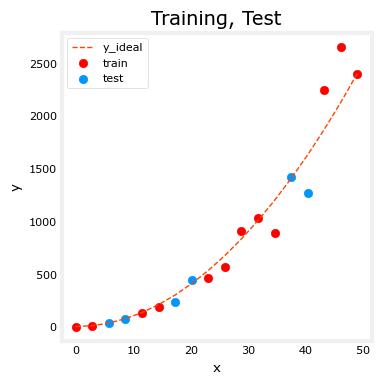

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

[17.29  8.65 37.47  5.76 40.35 20.18]


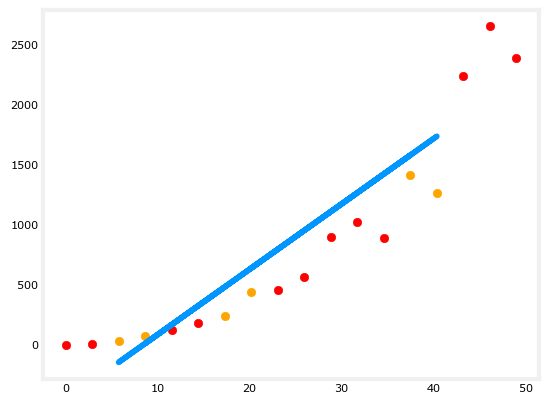

In [29]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

pl = lr.predict(X_test.reshape(-1,1))
print(X_test)
plt.plot(X_test,pl)
plt.scatter(X_train,y_train,color = "red")
plt.scatter(X_test,y_test,color = "orange")
plt.show()